# Notebook for testing showCamera.
Initially written 09 Mar 2020 by Craig Lage.\
Testing with comCam data from 2020-08-12.

In [1]:
! eups list -s | grep lsst_distrib
! eups list -s cp_pipe
! eups list -s obs_lsst

lsst_distrib          21.0.0-1-g00ce914+38311a9037 	current w_2021_08 setup
   21.0.0-10-gcf60f90+5850361f4f 	current w_2021_08 setup
   21.0.0-14-gd6c32a3+ca5ab316ea 	current w_2021_08 setup


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
from lsst.daf.persistence import Butler
import lsst.afw.cameraGeom.utils as camGeomUtils
import lsst.afw.display as afwDisplay

In [3]:
#REPO_DIR = '/project/shared/comCam-CCS/rerun/cslage/ISR_ComCam_2020-12-28'
REPO_DIR = '/project/shared/auxTel/rerun/cslage/PTC_Defect_2021-02-17'
butler = Butler(REPO_DIR)
dayObs = '2021-02-17'

/home/cslage/alternate_branches/obs_base/python/lsst/obs/base/filters.py:92: FutureWarning: Call to deprecated function (or staticmethod) resetFilters. (Removed with no replacement (FilterLabels do not need to be reset). Will be removed after v22.) -- Deprecated since version v22.
  lsst.afw.image.utils.resetFilters()
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.4.1/Linux64/afw/21.0.0-18-g1421380c6+e734d31160/python/lsst/afw/image/utils.py:58: FutureWarning: Replaced by FilterLabel. Will be removed after v22.
  Filter.reset()
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.4.1/Linux64/afw/21.0.0-18-g1421380c6+e734d31160/python/lsst/afw/image/utils.py:59: FutureWarning: Removed with no replacement (but see lsst.afw.image.TransmissionCurve).Will be removed after v22.
  FilterProperty.reset()
/home/cslage/alternate_branches/obs_base/python/lsst/obs/base/filters.py:189: FutureWarning: Call to deprecated function (or staticmethod) defineFilter. (Removed with no replacement 

In [11]:
expId=2021021700349
det = 0
REPO_DIR = '/project/shared/auxTel/rerun/cslage/PTC_OvBias+Only_2021-02-17'
butler = Butler(REPO_DIR)
exp2 = butler.get('postISRCCD', detector=det, dayObs=dayObs, expId=expId)
mean2 = np.mean(exp2.getMaskedImage().getArrays()[0])
std2 = np.std(exp2.getMaskedImage().getArrays()[0])

print(mean1, mean2)

Ignoring translator header fixup of LATISS AT_O_20210217_000349: 'MJD-OBS not found'


552.37024 1641.9188


In [12]:
REPO_DIR = '/project/shared/auxTel/rerun/cslage/PTC_Defect_2021-02-17'
butler = Butler(REPO_DIR)

exp1 = butler.get('postISRCCD', detector=det, dayObs=dayObs, expId=expId)
mean1 = np.mean(exp1.getMaskedImage().getArrays()[0])
std1 = np.std(exp1.getMaskedImage().getArrays()[0])

Ignoring translator header fixup of LATISS AT_O_20210217_000349: 'MJD-OBS not found'


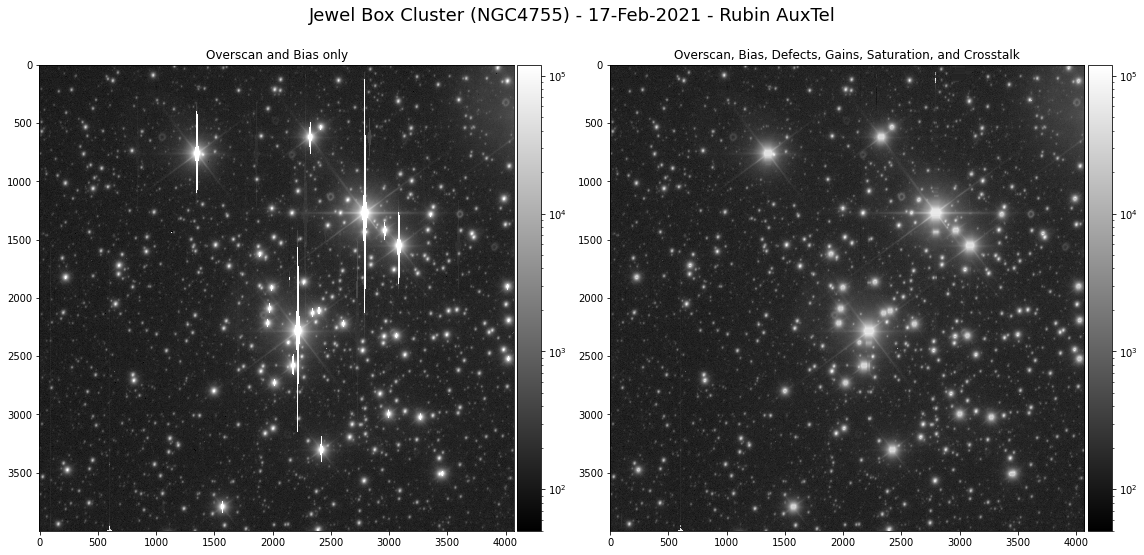

In [13]:
from matplotlib.colors import LogNorm
# Now let's look at ithem
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

plt.figure(figsize=(16,8))
plt.suptitle("Jewel Box Cluster (NGC4755) - 17-Feb-2021 - Rubin AuxTel",fontsize=18)
arr1 = exp1.image.array
plt.subplot(1,2,2)
plt.title("Overscan, Bias, Defects, Gains, Saturation, and Crosstalk")
img1 = plt.imshow(arr1, norm=LogNorm(vmin=50, vmax=120000), interpolation='Nearest', cmap='gray')
colorbar(img1)
plt.subplot(1,2,1)
plt.title("Overscan and Bias only")
arr2 = exp2.image.array
img2 = plt.imshow(arr2, norm=LogNorm(vmin=50, vmax=120000), interpolation='Nearest', cmap='gray')
colorbar(img2)
plt.tight_layout(h_pad=1)
plt.savefig(REPO_DIR+"/plots/NGC4755_17Feb21.pdf")
